## Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Load the data set
data=pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
#visualize the top five rows in the data using the head function
data.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

## Data Exploration

### Summary Statistics

In [5]:
data[['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']].describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


### Pie Chart
* Pie chart shows that we have a good collection of all types of data.

<Axes: ylabel='NObeyesdad'>

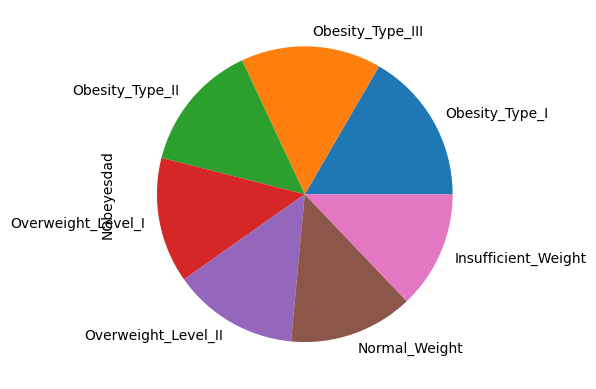

In [6]:
data['NObeyesdad'].value_counts().plot(kind='pie')

### Heat Map

<Axes: >

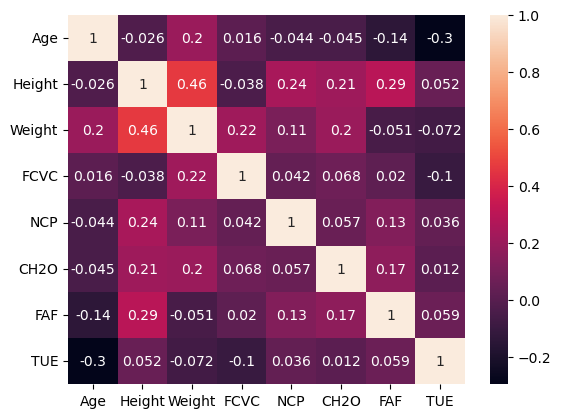

In [7]:
corr=data[['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']].corr()
sns.heatmap(corr, annot=True)

### Scatter Plot

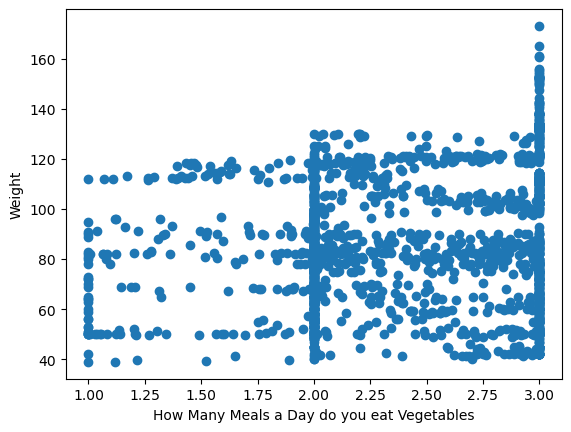

In [8]:
plt.scatter(data['FCVC'], data['Weight'])
plt.xlabel("How Many Meals a Day do you eat Vegetables")
plt.ylabel("Weight")
plt.show()

### Split the dataset into independent (X s) and Dependent variables (y)

In [9]:
x=data.drop("NObeyesdad", axis=1)
y=data[['NObeyesdad']]

In [10]:
x.sample()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS
872,23.367212,Male,1.853223,87.083266,Sometimes,yes,2.0,1.097312,no,no,1.328835,yes,1.264257,1.0,Sometimes,Automobile


In [11]:
y.sample()

,NObeyesdad
965,Overweight_Level_I


## Data Prep for Multiple Linear Regression

In [12]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()
Y = le.fit_transform(y)
print(Y)
#Label encoding of dependant variable

[1 1 1 ... 4 4 4]


In [78]:
print(Y[1530])

3


In [77]:
print(data.iloc[1530])

Age                                      27.83173
Gender                                       Male
Height                                   1.704028
Weight                                 101.634313
CALC                                    Sometimes
FAVC                                          yes
FCVC                                     2.630401
NCP                                           1.0
SCC                                            no
SMOKE                                          no
CH2O                                          1.0
family_history_with_overweight                yes
FAF                                      0.245354
TUE                                      0.315261
CAEC                                    Sometimes
MTRANS                                 Automobile
NObeyesdad                        Obesity_Type_II
Name: 1530, dtype: object


In [13]:
X=pd.get_dummies(x,drop_first=True)

In [14]:
X.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,CALC_Frequently,...,SCC_yes,SMOKE_yes,family_history_with_overweight_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,0,0,...,0,0,1,0,1,0,0,0,1,0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,0,0,...,1,1,1,0,1,0,0,0,1,0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,1,1,...,0,0,1,0,1,0,0,0,1,0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,1,1,...,0,0,0,0,1,0,0,0,0,1
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,1,0,...,0,0,0,0,1,0,0,0,1,0


## Logistic Regression

### Splitting the dataset into the Training set and Test set

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X, Y,
                                                  test_size=.15,
                                                  random_state=20)

### Training the Logistical Regression model

In [110]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train.values, Y_train)

LogisticRegression()

### Model Performance check using Confusion matrix, Confusion matrix display and classification report

In [111]:
Y_pred=classifier.predict(X_test.values)

In [112]:
Y_pred[:5]

array([3, 0, 4, 4, 3])

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm=confusion_matrix(Y_test,Y_pred)
print(cm)

[[32  5  0  0  0  0  0]
 [ 7 25  3  0  0 12  1]
 [ 0  1 27  4  2  1 10]
 [ 0  0  4 45  0  0  0]
 [ 0  0  1  0 45  0  0]
 [ 0  4  5  1  0 36  4]
 [ 0  6 11  1  0  6 18]]


In [28]:
print(classifier.classes_)

[0 1 2 3 4 5 6]


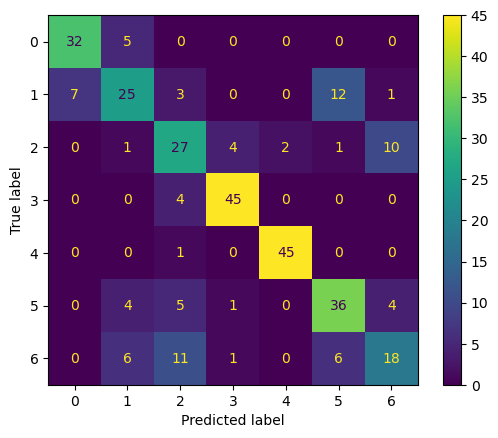

In [29]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=classifier.classes_)
disp.plot()
plt.show()

In [113]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84        37
           1       0.61      0.52      0.56        48
           2       0.53      0.60      0.56        45
           3       0.88      0.92      0.90        49
           4       0.96      0.98      0.97        46
           5       0.65      0.72      0.69        50
           6       0.55      0.43      0.48        42

    accuracy                           0.72       317
   macro avg       0.71      0.72      0.71       317
weighted avg       0.71      0.72      0.71       317



### Predicting Results for Model 1 test_size= .15 random_size=20

### Encoding for NObeyesdad 
    0 = insufficient_Weight
    1 = Normal Weight
    2 = Obesity Type I
    3 = Obesity Type II
    4 = Obesity Type III
    5 = Overweight Level I
    6 = Overweight Level II

In [36]:
pd.set_option("display.max_columns", None)

In [37]:
X.sample(5)

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,CALC_Frequently,CALC_Sometimes,CALC_no,FAVC_yes,SCC_yes,SMOKE_yes,family_history_with_overweight_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
438,19.000000,1.670000,64.000000,3.000000,3.000000,2.000000,2.000000,1.000000,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
930,21.009437,1.606810,67.773914,2.000000,3.156309,3.000000,1.179592,0.086868,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0
33,39.000000,1.790000,90.000000,2.000000,1.000000,2.000000,0.000000,0.000000,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0
1588,25.100513,1.830596,118.424156,1.455602,3.000000,2.363307,1.144683,0.101026,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0
1911,18.314593,1.745602,133.554686,3.000000,3.000000,2.923792,1.536555,0.625350,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0


In [38]:
print(classifier.predict([[19.000000,1.670000,64.000000,3.000000,3.000000,2.000000,2.000000,1.000000,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0]]))

[1]


In [42]:
print(data.iloc[438])

Age                                        19.0
Gender                                   Female
Height                                     1.67
Weight                                     64.0
CALC                                  Sometimes
FAVC                                        yes
FCVC                                        3.0
NCP                                         3.0
SCC                                          no
SMOKE                                        no
CH2O                                        2.0
family_history_with_overweight               no
FAF                                         2.0
TUE                                         1.0
CAEC                                  Sometimes
MTRANS                               Automobile
NObeyesdad                        Normal_Weight
Name: 438, dtype: object


In [43]:
print(classifier.predict([[21.009437,1.606810,67.773914,2.000000,3.156309,3.000000,1.179592,0.086868,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0]]))

[5]


In [44]:
print(data.iloc[930])

Age                                           21.009437
Gender                                           Female
Height                                          1.60681
Weight                                        67.773914
CALC                                          Sometimes
FAVC                                                yes
FCVC                                                2.0
NCP                                            3.156309
SCC                                                  no
SMOKE                                                no
CH2O                                                3.0
family_history_with_overweight                      yes
FAF                                            1.179592
TUE                                            0.086868
CAEC                                                 no
MTRANS                            Public_Transportation
NObeyesdad                           Overweight_Level_I
Name: 930, dtype: object


In [52]:
print(classifier.predict([[39.000000,1.790000,90.000000,2.000000,1.000000,2.000000,0.000000,0.000000,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0]]))

[6]


In [53]:
print(data.iloc[33])

Age                                                39.0
Gender                                             Male
Height                                             1.79
Weight                                             90.0
CALC                                          Sometimes
FAVC                                                 no
FCVC                                                2.0
NCP                                                 1.0
SCC                                                  no
SMOKE                                                no
CH2O                                                2.0
family_history_with_overweight                       no
FAF                                                 0.0
TUE                                                 0.0
CAEC                                          Sometimes
MTRANS                            Public_Transportation
NObeyesdad                          Overweight_Level_II
Name: 33, dtype: object


In [97]:
print(classifier.predict([[18.314593,1.745602,133.554686,3.000000,3.000000,2.923792,1.536555,0.625350,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0]]))

[4]


In [96]:
print(data.iloc[1911])

Age                                           18.314593
Gender                                           Female
Height                                         1.745602
Weight                                       133.554686
CALC                                          Sometimes
FAVC                                                yes
FCVC                                                3.0
NCP                                                 3.0
SCC                                                  no
SMOKE                                                no
CH2O                                           2.923792
family_history_with_overweight                      yes
FAF                                            1.536555
TUE                                             0.62535
CAEC                                          Sometimes
MTRANS                            Public_Transportation
NObeyesdad                             Obesity_Type_III
Name: 1911, dtype: object


### Predicting Results for Model 2 test_size= .20 random_size=30

### Encoding for NObeyesdad 
    0 = insufficient_Weight
    1 = Normal Weight
    2 = Obesity Type I
    3 = Obesity Type II
    4 = Obesity Type III
    5 = Overweight Level I
    6 = Overweight Level II

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X, Y,
                                                  test_size=.20,
                                                  random_state=30)

In [118]:
Y_pred=classifier.predict(X_test.values)

In [80]:
X.sample(3)

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,CALC_Frequently,CALC_Sometimes,CALC_no,FAVC_yes,SCC_yes,SMOKE_yes,family_history_with_overweight_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
19,23.0,1.650000,70.000000,2.0,1.000000,2.000000,0.0,0.000000,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0
1940,26.0,1.622468,110.400847,3.0,3.000000,2.695094,0.0,0.413474,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0
877,18.0,1.647971,68.818893,2.0,1.411685,1.859089,0.0,1.306000,0,0,0,1,1,0,0,1,0,1,0,0,0,1,0


In [84]:
print(classifier.predict([[23.0,1.650000,70.000000,2.0,1.000000,2.000000,0.0,0.000000,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0]]))

[6]


In [81]:
print(data.iloc[19])

Age                                                23.0
Gender                                           Female
Height                                             1.65
Weight                                             70.0
CALC                                          Sometimes
FAVC                                                 no
FCVC                                                2.0
NCP                                                 1.0
SCC                                                  no
SMOKE                                                no
CH2O                                                2.0
family_history_with_overweight                      yes
FAF                                                 0.0
TUE                                                 0.0
CAEC                                          Sometimes
MTRANS                            Public_Transportation
NObeyesdad                           Overweight_Level_I
Name: 19, dtype: object


In [85]:
print(classifier.predict([[26.0,1.622468,110.400847,3.0,3.000000,2.695094,0.0,0.413474,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0]]))

[4]


In [82]:
print(data.iloc[1940])

Age                                                26.0
Gender                                           Female
Height                                         1.622468
Weight                                       110.400847
CALC                                          Sometimes
FAVC                                                yes
FCVC                                                3.0
NCP                                                 3.0
SCC                                                  no
SMOKE                                                no
CH2O                                           2.695094
family_history_with_overweight                      yes
FAF                                                 0.0
TUE                                            0.413474
CAEC                                          Sometimes
MTRANS                            Public_Transportation
NObeyesdad                             Obesity_Type_III
Name: 1940, dtype: object


In [86]:
print(classifier.predict([[18.0,1.647971,68.818893,2.0,1.411685,1.859089,0.0,1.306000,0,0,0,1,1,0,0,1,0,1,0,0,0,1,0]]))

[2]


In [83]:
print(data.iloc[877])

Age                                                18.0
Gender                                           Female
Height                                         1.647971
Weight                                        68.818893
CALC                                                 no
FAVC                                                yes
FCVC                                                2.0
NCP                                            1.411685
SCC                                                  no
SMOKE                                                no
CH2O                                           1.859089
family_history_with_overweight                      yes
FAF                                                 0.0
TUE                                               1.306
CAEC                                          Sometimes
MTRANS                            Public_Transportation
NObeyesdad                           Overweight_Level_I
Name: 877, dtype: object


In [119]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        51
           1       0.58      0.58      0.58        50
           2       0.69      0.64      0.66        83
           3       0.82      0.93      0.87        58
           4       0.89      1.00      0.94        64
           5       0.52      0.57      0.55        58
           6       0.50      0.32      0.39        59

    accuracy                           0.70       423
   macro avg       0.68      0.70      0.69       423
weighted avg       0.69      0.70      0.69       423



### Predicting Results for Model 3 test_size= .10 random_size=25

### Encoding for NObeyesdad 
    0 = insufficient_Weight
    1 = Normal Weight
    2 = Obesity Type I
    3 = Obesity Type II
    4 = Obesity Type III
    5 = Overweight Level I
    6 = Overweight Level II

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X, Y,
                                                  test_size=.10,
                                                  random_state=25)

In [121]:
Y_pred=classifier.predict(X_test.values)

In [88]:
X.sample(3)

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,CALC_Frequently,CALC_Sometimes,CALC_no,FAVC_yes,SCC_yes,SMOKE_yes,family_history_with_overweight_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
494,18.000000,1.670000,66.000000,3.00000,3.00000,2.000000,0.000000,0.000000,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0
1991,21.656907,1.729099,134.842656,3.00000,3.00000,1.395400,1.931173,0.878258,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0
751,41.823567,1.721854,82.919584,2.81646,3.36313,2.722063,3.000000,0.265790,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0


In [92]:
print(classifier.predict([[18.000000,1.670000,66.000000,3.00000,3.00000,2.000000,0.000000,0.000000,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0]]))

[4]


In [89]:
print(data.iloc[494])

Age                                                18.0
Gender                                           Female
Height                                             1.67
Weight                                             66.0
CALC                                          Sometimes
FAVC                                                yes
FCVC                                                3.0
NCP                                                 3.0
SCC                                                  no
SMOKE                                                no
CH2O                                                2.0
family_history_with_overweight                       no
FAF                                                 0.0
TUE                                                 0.0
CAEC                                          Sometimes
MTRANS                            Public_Transportation
NObeyesdad                                Normal_Weight
Name: 494, dtype: object


In [93]:
print(classifier.predict([[21.656907,1.729099,134.842656,3.00000,3.00000,1.395400,1.931173,0.878258,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0]]))

[4]


In [90]:
print(data.iloc[1991])

Age                                           21.656907
Gender                                           Female
Height                                         1.729099
Weight                                       134.842656
CALC                                          Sometimes
FAVC                                                yes
FCVC                                                3.0
NCP                                                 3.0
SCC                                                  no
SMOKE                                                no
CH2O                                             1.3954
family_history_with_overweight                      yes
FAF                                            1.931173
TUE                                            0.878258
CAEC                                          Sometimes
MTRANS                            Public_Transportation
NObeyesdad                             Obesity_Type_III
Name: 1991, dtype: object


In [94]:
print(classifier.predict([[41.823567,1.721854,82.919584,2.81646,3.36313,2.722063,3.000000,0.265790,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0]]))

[1]


In [91]:
print(data.iloc[751])

Age                                        41.823567
Gender                                        Female
Height                                      1.721854
Weight                                     82.919584
CALC                                       Sometimes
FAVC                                             yes
FCVC                                         2.81646
NCP                                          3.36313
SCC                                               no
SMOKE                                             no
CH2O                                        2.722063
family_history_with_overweight                    no
FAF                                              3.0
TUE                                          0.26579
CAEC                                       Sometimes
MTRANS                                    Automobile
NObeyesdad                        Overweight_Level_I
Name: 751, dtype: object


In [122]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86        25
           1       0.50      0.42      0.45        24
           2       0.66      0.61      0.63        38
           3       0.88      0.88      0.88        34
           4       0.97      1.00      0.99        36
           5       0.48      0.62      0.55        24
           6       0.55      0.52      0.53        31

    accuracy                           0.72       212
   macro avg       0.70      0.70      0.70       212
weighted avg       0.72      0.72      0.71       212



## Discussing Results

 * Model 1, with a test_size=.10 and random_size=20, had perfect results and returned the right Obesity level for each test.
 * Model 2, with a test_size=.20 and random_size=30, only got one test result right out of the three we tested. This 33% accuracy rate is not very accurate and shouldn't be used.
 * Model 3, with a test_size=.10 and random_size=25, only got one test result right out of the three we tested. This 33% accuracy rate is not very accurate and shouldn't be used.